#import required library function

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import joblib
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from joblib import dump,load

#load the data

In [2]:
normal_files=os.listdir("D:\\Pneumonia\\train\\NORMAL")
print(normal_files[0:5])
print(normal_files[-5:])

['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg']
['NORMAL2-IM-1406-0001.jpeg', 'NORMAL2-IM-1412-0001.jpeg', 'NORMAL2-IM-1419-0001.jpeg', 'NORMAL2-IM-1422-0001.jpeg', 'NORMAL2-IM-1423-0001.jpeg']


In [3]:
pneumonia_files=os.listdir(r"D:\Pneumonia\train\PNEUMONIA")
print(pneumonia_files[0:5])
print(pneumonia_files[-5:])

['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg']
['person99_virus_183.jpeg', 'person9_bacteria_38.jpeg', 'person9_bacteria_39.jpeg', 'person9_bacteria_40.jpeg', 'person9_bacteria_41.jpeg']


#labels

In [4]:
print("Normal:",len(normal_files))
print("Pneumonia:",len(pneumonia_files))

Normal: 1341
Pneumonia: 3875


In [5]:
normal_label=[0]*1341
pneumonia_label=[1]*3875

#visualize sample image

Text(0.5, 1.0, 'Normal')

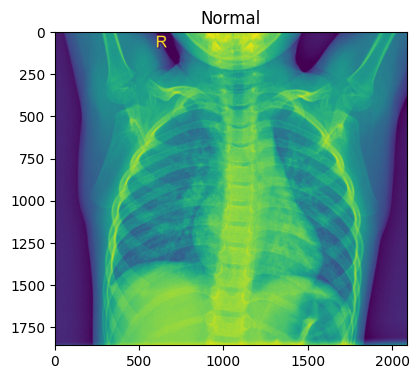

In [6]:
image_normal=mpimg.imread(r"D:\\Pneumonia\\train\\NORMAL\\IM-0115-0001.jpeg")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_normal)
plt.title("Normal")

Text(0.5, 1.0, 'Pneumonia')

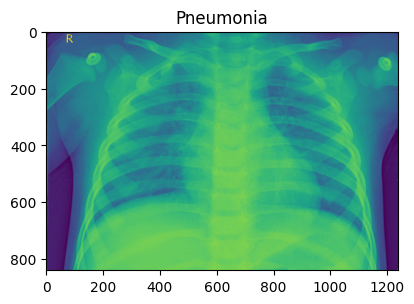

In [7]:
image_pneumonia=mpimg.imread(r"D:\\Pneumonia\\train\\PNEUMONIA\\person1_bacteria_2.jpeg")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_pneumonia)
plt.title("Pneumonia")

#image Processing

In [8]:
normal_path=("D:\\Pneumonia\\train\\NORMAL\\")
data=[]
labels=[]
for img_file in normal_files:
  image=Image.open(normal_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)
  labels.append(0)

pneumonia_path=(r"D:\Pneumonia\train\PNEUMONIA\\")
for img_file in pneumonia_files:
  image=Image.open(pneumonia_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)
  labels.append(1)

In [11]:
len(data)

5216

In [12]:
data[0]

array([[[22, 22, 22],
        [19, 19, 19],
        [16, 16, 16],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [95, 95, 95]],

       [[22, 22, 22],
        [19, 19, 19],
        [16, 16, 16],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [93, 93, 93]],

       [[21, 21, 21],
        [19, 19, 19],
        [16, 16, 16],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [91, 91, 91]],

       ...,

       [[29, 29, 29],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [30, 30, 30],
        [32, 32, 32],
        [32, 32, 32]],

       [[30, 30, 30],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       [[41, 41, 41],
        [40, 40, 40],
        [39, 39, 39],
        ...,
        [96, 96, 96],
        [97, 97, 97],
        [98, 98, 98]]], shape=(128, 128, 3), dtype=uint8)

In [13]:
data[0].shape

(128, 128, 3)

#converting data and labels into numpy array

In [15]:
x=np.array(data)
y=np.array(labels)

type(x)
type(y)

numpy.ndarray

In [16]:
print(x.shape)
print(y.shape)

(5216, 128, 128, 3)
(5216,)


#Train Test split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(5216, 128, 128, 3) (4172, 128, 128, 3) (1044, 128, 128, 3)


#scaled the data

In [18]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [19]:
x_train[0]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [178, 178, 178],
        [251, 251, 251],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [179, 179, 179],
        [251, 251, 251],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [178, 178, 178],
        [250, 250, 250],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [120, 120, 120],
        [147, 147, 147],
        [234, 234, 234]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [124, 124, 124],
        [149, 149, 149],
        [236, 236, 236]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [125, 125, 125],
        [150, 150, 150],
        [235, 235, 235]]

In [20]:
x_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.69803922, 0.69803922, 0.69803922],
        [0.98431373, 0.98431373, 0.98431373],
        [1.        , 1.        , 1.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.70196078, 0.70196078, 0.70196078],
        [0.98431373, 0.98431373, 0.98431373],
        [1.        , 1.        , 1.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.69803922, 0.69803922, 0.69803922],
        [0.98039216, 0.98039216, 0.98039216],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [21]:
x_train_flattened=x_train_scaled.reshape(x_train_scaled.shape[0],-1)
x_test_flattened=x_test_scaled.reshape(x_test_scaled.shape[0],-1)

print(f"Flattened Train Data Shape:{x_train_flattened.shape}")
print(f"Flattened Test Data Shape:{x_test_flattened.shape}")

Flattened Train Data Shape:(4172, 49152)
Flattened Test Data Shape:(1044, 49152)


#PCA

In [22]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100)  # You can also try 0.95 for retaining 95% variance
x_train_pca = pca.fit_transform(x_train_flattened)
x_test_pca = pca.transform(x_test_flattened)

print(f"Reduced Train Shape: {x_train_pca.shape}")
print(f"Reduced Test Shape: {x_test_pca.shape}")


Reduced Train Shape: (4172, 100)
Reduced Test Shape: (1044, 100)


#train SVM model

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.01, 0.1]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_pca, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Best model
svm_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = svm_model.predict(x_test_pca)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9702749895891669


In [24]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9702749895891669


Optimized Model Accuracy: 0.9703
Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.95      0.94       278
   Pneumonia       0.98      0.98      0.98       766

    accuracy                           0.97      1044
   macro avg       0.96      0.96      0.96      1044
weighted avg       0.97      0.97      0.97      1044

Confusion Matrix:
[[263  15]
 [ 16 750]]


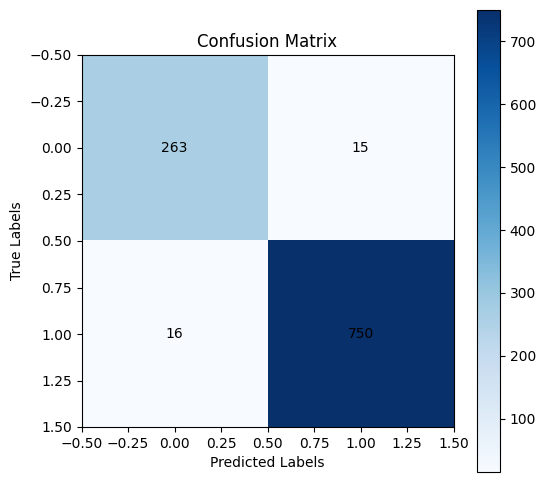

In [25]:
# Get the best model from grid search
optimized_model = grid_search.best_estimator_

# Train on the full PCA-reduced training data
optimized_model.fit(x_train_pca, y_train)

# Evaluate the optimized model
y_pred = optimized_model.predict(x_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Pneumonia"]))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


#Voting Classifier Ensemble

In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define base models
svc = SVC(kernel=grid_search.best_params_['kernel'], 
          C=grid_search.best_params_['C'], 
          gamma=grid_search.best_params_['gamma'],
          probability=True)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
logreg = LogisticRegression(max_iter=1000)

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('svc', svc),
    ('rf', rf),
    ('logreg', logreg)
], voting='soft')

voting_clf.fit(x_train_pca, y_train)
y_pred_voting = voting_clf.predict(x_test_pca)

# Evaluate
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"\nVoting Classifier Accuracy: {accuracy_voting:.4f}")
print("Voting Classifier Report:")
print(classification_report(y_test, y_pred_voting, target_names=["Normal", "Pneumonia"]))



Voting Classifier Accuracy: 0.9636
Voting Classifier Report:
              precision    recall  f1-score   support

      Normal       0.95      0.91      0.93       278
   Pneumonia       0.97      0.98      0.98       766

    accuracy                           0.96      1044
   macro avg       0.96      0.95      0.95      1044
weighted avg       0.96      0.96      0.96      1044



#Bagging with SVM

In [29]:
from sklearn.ensemble import BaggingClassifier

bagging_svm = BaggingClassifier(estimator=svc, n_estimators=10, random_state=42)
bagging_svm.fit(x_train_pca, y_train)
y_pred_bagging = bagging_svm.predict(x_test_pca)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"\nBagging SVM Accuracy: {accuracy_bagging:.4f}")
print("Bagging Classifier Report:")
print(classification_report(y_test, y_pred_bagging, target_names=["Normal", "Pneumonia"]))



Bagging SVM Accuracy: 0.9713
Bagging Classifier Report:
              precision    recall  f1-score   support

      Normal       0.95      0.95      0.95       278
   Pneumonia       0.98      0.98      0.98       766

    accuracy                           0.97      1044
   macro avg       0.96      0.96      0.96      1044
weighted avg       0.97      0.97      0.97      1044



#Boosting (AdaBoost with Decision Trees)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                              n_estimators=100, learning_rate=0.8, random_state=42)
adaboost.fit(x_train_pca, y_train)
y_pred_boost = adaboost.predict(x_test_pca)

accuracy_boost = accuracy_score(y_test, y_pred_boost)
print(f"\nAdaBoost Accuracy: {accuracy_boost:.4f}")
print("AdaBoost Report:")
print(classification_report(y_test, y_pred_boost, target_names=["Normal", "Pneumonia"]))



AdaBoost Accuracy: 0.9521
AdaBoost Report:
              precision    recall  f1-score   support

      Normal       0.94      0.87      0.91       278
   Pneumonia       0.96      0.98      0.97       766

    accuracy                           0.95      1044
   macro avg       0.95      0.93      0.94      1044
weighted avg       0.95      0.95      0.95      1044



#save the model

In [36]:
model_filename = "Optimized_SVM_Pneumonia_Model.joblib"
dump((pca, optimized_model), model_filename)
print(f"Optimized model and PCA saved to {model_filename}")


Optimized model and PCA saved to Optimized_SVM_Pneumonia_Model.joblib


#check Prediction

In [37]:
def predict_image(image_path):
    try:
        image = Image.open(image_path).resize((128,128)).convert('RGB')
        image = np.array(image) / 255.0
        image = image.flatten().reshape(1, -1)

        pca, model = load("Optimized_SVM_Pneumonia_Model.joblib")
        image_pca = pca.transform(image)

        prediction = model.predict(image_pca)
        return "Pneumonia" if prediction[0] == 1 else "Normal"

    except FileNotFoundError:
        return f"File Not Found: {image_path}"

 
new_image_path=(r"D:\Pneumonia\train\PNEUMONIA\person1_bacteria_2.jpeg")

result=predict_image(new_image_path)
print(f"FIRST prediction for the new image is {result}")

new_image_path=(r"D:\Pneumonia\train\NORMAL\IM-0115-0001.jpeg")

result=predict_image(new_image_path)
print(f"SECOND prediction for the new image is {result}")

FIRST prediction for the new image is Pneumonia
SECOND prediction for the new image is Normal
